In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
urls = [
    'https://raw.githubusercontent.com/casasmgb/curso-ml/refs/heads/main/02-section/dogs/dogs_train_part1.csv',
    'https://raw.githubusercontent.com/casasmgb/curso-ml/refs/heads/main/02-section/dogs/dogs_train_part2.csv',
    'https://raw.githubusercontent.com/casasmgb/curso-ml/refs/heads/main/02-section/dogs/dogs_train_part3.csv',
    'https://raw.githubusercontent.com/casasmgb/curso-ml/refs/heads/main/02-section/dogs/dogs_train_part4.csv'
]
dataframes = []

# Descargar y leer cada parte del CSV
for url in urls:
    data = requests.get(url).content
    df_part = pd.read_csv(io.StringIO(data.decode('utf-8')), header=None)
    dataframes.append(df_part)

# Unir todas las partes en un solo DataFrame
df_combined = pd.concat(dataframes, ignore_index=True)

In [3]:
df_combined

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,49152
0,223,171,154,224,172,155,226,174,157,227,...,132,125,140,129,122,136,125,118,133,Ibizan_hound
1,94,87,78,112,103,93,124,116,110,73,...,145,152,161,94,91,117,123,144,168,Ibizan_hound
2,116,81,96,63,51,69,40,44,61,25,...,104,134,135,108,136,137,103,133,128,Ibizan_hound
3,58,20,36,49,17,32,39,16,30,31,...,75,87,89,78,91,93,102,116,114,Ibizan_hound
4,45,25,14,44,24,13,39,19,8,45,...,65,75,69,82,99,92,49,67,60,Ibizan_hound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2,30,70,20,44,83,23,44,54,33,...,79,90,89,38,45,49,28,29,27,borzoi
525,26,31,30,33,38,37,36,41,40,29,...,20,37,23,12,27,13,8,25,11,borzoi
526,48,30,10,43,16,5,77,51,34,36,...,60,117,118,82,152,159,89,152,155,borzoi
527,196,205,205,31,77,71,49,96,90,47,...,23,78,59,12,51,37,89,132,111,borzoi


### Mostrar una imagen para verificar

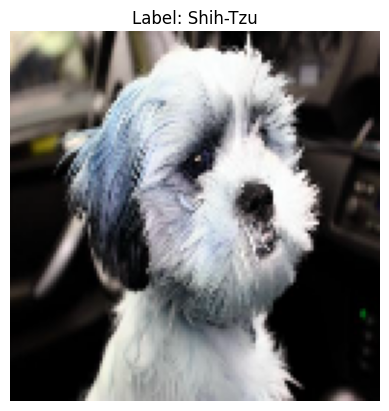

In [4]:
index = 258
# Seleccionar la fila correspondiente
row = df_combined.iloc[index]

# Separar la matriz de la imagen y el label (la etiqueta es el último elemento)
image_data = row[:-1].to_numpy()  # Todos los valores menos el último
label = row.iloc[-1]  # El último valor es la etiqueta

# Reconstruir la imagen (128x128x3)
image_data = image_data.astype(np.uint8)  # Convertir los datos a enteros
image_data = image_data.reshape((128, 128, 3))  # Redimensionar a la forma original

# Mostrar la imagen usando Matplotlib
plt.imshow(image_data)
plt.title(f'Label: {label}')
plt.axis('off')  # Ocultar los ejes
plt.show()

### dividir el dataset

In [5]:
X = df_combined.iloc[:, :-1].values  # Todas las columnas menos la ultima (solo píxeles)
y = df_combined.iloc[:, -1].values   # ultima columna (etiquetas)

# Se debe codificar las etiquetas ya que esta en texto
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


### Escalar los Datos

In [6]:
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Crear Modelo y Evaluar

In [7]:
# SVM
svm_model = SVC(kernel='rbf')  # Puedes probar otros kernels como 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo SVM: {accuracy * 100:.2f}%')

Accuracy del modelo SVM: 16.04%


In [8]:
'''
## Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo Random Forest: {accuracy * 100:.2f}%')
'''

"\n## Random Forest\nrf_model = RandomForestClassifier(n_estimators=1000, random_state=42)\nrf_model.fit(X_train, y_train)\n\ny_pred = rf_model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Accuracy del modelo Random Forest: {accuracy * 100:.2f}%')\n"

In [9]:
'''
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=1000, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo MLP: {accuracy * 100:.2f}%')
'''

"\nmlp = MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=1000, activation='relu', solver='adam', random_state=42)\nmlp.fit(X_train, y_train)\n\ny_pred = mlp.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Accuracy del modelo MLP: {accuracy * 100:.2f}%')\n"

### Nueva Prediccion con una nueva imagen

In [11]:
def predict_new_image(new_image, model):
    new_image_reshaped = np.array(new_image).reshape(1, -1)
    prediction = model.predict(new_image_reshaped)
    predicted_label = le.inverse_transform(prediction)[0]
    return predicted_label

Nueva Prediccion: Japanese_spaniel


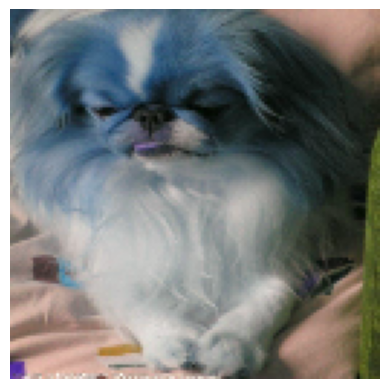

In [40]:
index = 19  # 19
image_data = X_test[index]

# rf_model svm_model  mlp
label_predicted = predict_new_image(image_data, svm_model)
print(f'Nueva Prediccion: {label_predicted}')

image_data = image_data.astype(np.uint8)
image_data = image_data.reshape((128, 128, 3))

# Mostrar la imagen usando Matplotlib
plt.imshow(image_data)
plt.axis('off')  # Ocultar los ejes
plt.show()

### Mostrar una imagen que ya conocemos usando el label

(128, 128, 3)


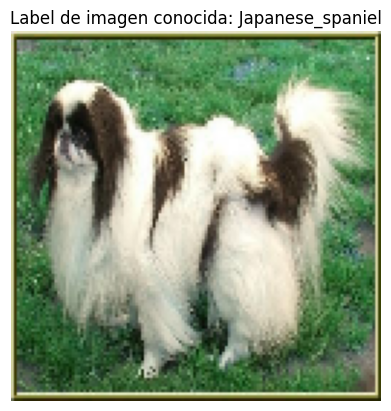

In [41]:
filtered_data = df_combined[df_combined.iloc[:, -1] == label_predicted]

# Seleccionar la primera fila que corresponde al label
image_data_conocido = filtered_data.iloc[0, :-1].values  # Obtener solo los píxeles (todas menos la última columna)
image_data_conocido = image_data_conocido.astype(np.uint8)
image_array = image_data_conocido.reshape(128, 128, 3)  # Redimensionar a 128x128 (ajusta si tu imagen tiene un canal diferente

print(image_array.shape)

# Mostrar la imagen
plt.imshow(image_array)
plt.title(f'Label de imagen conocida: {label_predicted}')
plt.axis('off')  # Ocultar ejes
plt.show()
